In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import argparse
import pickle

# Set the font globally
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'Times New Roman'

def get_test_mrr(file_path):
    try:
        with open(file_path, 'r') as f:
            mrr = None
            for lines in f:
                if lines.startswith('\ttest AP'):
                    mrr = float(lines.strip('\n').split(':')[-1])
                    return mrr
    except FileNotFoundError:
        import pdb; pdb.set_trace()
        pass

def get_best_epoch(file_path):
    try:
        with open(file_path, 'r') as f:
            epoch = None
            for lines in f:
                if lines.startswith('Loading'):
                    epoch = int(lines.split(' ')[4])
                    return epoch
    except FileNotFoundError:
        import pdb; pdb.set_trace()
        pass

show_datasets = {
    'WIKI': 'Wikipedia',
    'REDDIT': 'REDDIT',
    'Flights': 'Flights',
    'LASTFM': 'LASTFM',
    'mooc': 'MOOC',
    'uci': 'UCI',
    'CollegeMsg': 'CollegeMsg'
}


In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--trial', type=str, help='trial name')
parser.add_argument('--log_dir', type=str, default='log', help='log file directory')
parser.add_argument('--pkl_path', type=str, default='')
parser.add_argument('--target', type=str, default='mrr', choices=['mrr', 'epoch'])
parser.add_argument('--num_scope', type=int, default=25, help='trial name')
parser.add_argument('--num_neighbor', type=int, default=10, help='trial name')
parser.add_argument('--runs', type=int, default=5, help='trial name')
parser.add_argument('--layers', type=int, default=1, help='layer number')
parser.add_argument('--fontsize', type=int, default=32, help='font size')
parser.add_argument('--no_title', action='store_true')
parser.add_argument('--save_legends', action='store_true')

args = parser.parse_args(['--pkl_path', '../all_mrrs_0318.pkl'])
log_dir = args.log_dir
config_dir = 'config' + '/{}'.format(args.trial)
# Optionally, you can set the font size as well
plt.rcParams['font.size'] = args.fontsize
if args.layers == 1:
    scans = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '20', '50', '100']
else:
    scans = ['5x5', '5x10', '10x5', '10x10']
# datasets = ['WIKI', 'REDDIT', 'Flights', 'LASTFM', 'mooc', 'uci', 'CollegeMsg']
datasets = ['WIKI', 'uci', 'Flights', 'LASTFM', ]
aggrs = ['TGAT', 'GraphMixer']
show_aggrs = {
    'TGAT': 'Attention',
    'GraphMixer': 'MLP-Mixer'
}
samplings = ['re', 'uni',]
memorys = ['gru', 'embed', '']
show_memorys = {
    'gru': 'RNN',
    'embed': 'Embedding',
    '': 'None'
}
# configs = [f for f in os.listdir(config_dir) if f.endswith('.yml')]
# green_colors = ['#98FB98', '#DAF7A6', '#2FB617', '#6B8E23', '#008080', '#00441b']  # Shades of green
# red_colors = ['#FF9999', '#FFC300', '#fb6a4a', '#cb181d', '#990000', '#581845']  # Shades of red
# red_colors = ['#FF5733', 
#             '#FFC300',
#             '#DAF7A6',
#             '#C70039',
#             '#900C3F',
#             ]
colors = [
'#ff8a65',
'#ffd54f',
'#aed581',
# '#4db6ac',
# '#4fc3f7',
# '#7986cb',
# '#FF5733', 
# '#FFC300',
# '#DAF7A6',
# '#C70039',
# '#900C3F',
]

In [4]:
# load data
all_data = {}
if os.path.exists(args.pkl_path):
    with open(args.pkl_path, 'rb') as f:
        all_data = pickle.load(f)
else:
    raise NotImplementedError

In [5]:
all_data[dataset][scan].keys()

NameError: name 'dataset' is not defined

1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4
1 1
2 2
3 3
4 4


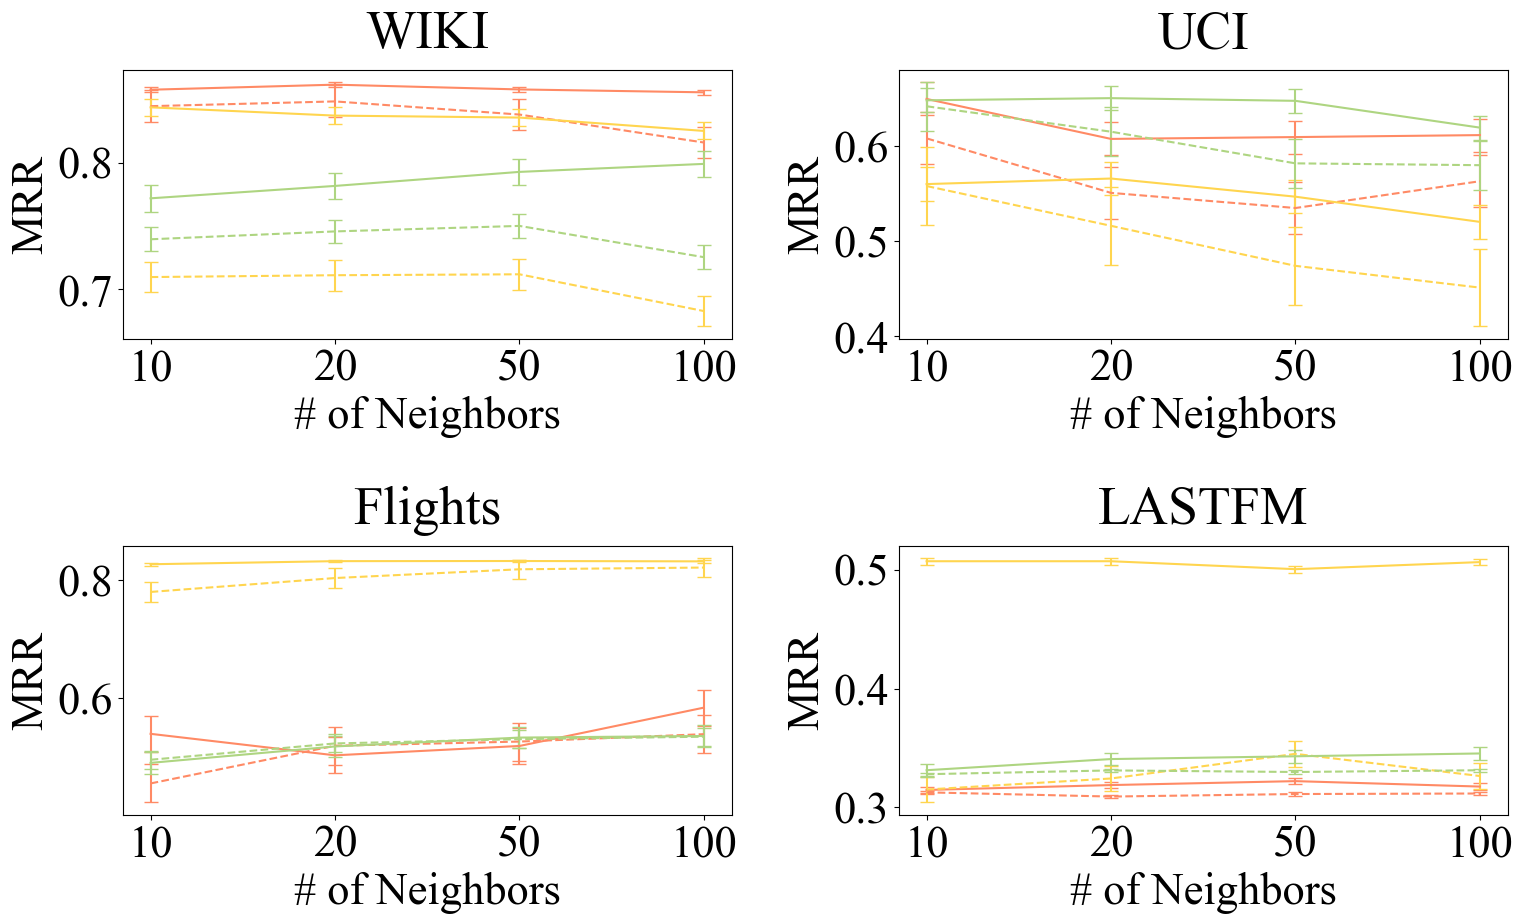

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16,10))
scans = ['10', '20', '50', '100']
# scans = ['5x5', '5x10', '10x5', '10x10']

handles = []
i = 0
ax = axes[0]
for k, dataset in enumerate(datasets):
    ax = axes.flat[k]
    if dataset == 'mooc' or dataset == 'uci':
        title_str = f'{dataset.upper()}'
    else:
        title_str = f'{dataset}'
    ax.set_title(title_str, x=0.5, y=1.05)
    df_mean1 = pd.DataFrame()
    df_mean2 = pd.DataFrame()
    df_std1 = pd.DataFrame()
    df_std2 = pd.DataFrame()
    for memory in memorys:
        sampling = 're'
        means = []
        stds = []
        results = []
        results2 = []
        for scan in scans:
            results.append(np.mean(np.array(all_data[dataset][scan]['TGAT'][sampling][memory]) ))
            results2.append(np.mean(np.array(all_data[dataset][scan]['GraphMixer'][sampling][memory])))
            print(len(results), len(results2))
            # assert len(all_data[dataset][scan]['TGAT'][sampling][memory]) == args.runs
            # assert len(all_data[dataset][scan]['GraphMixer'][sampling][memory]) == args.runs
        handles.append(ax.errorbar(x=range(len(scans)), y=results, yerr=np.std(results), fmt='-', capsize=5, label="", color=colors[i]))
        handles.append(ax.errorbar(x=range(len(scans)), y=results2, yerr=np.std(results2), fmt='--', capsize=5, label="", color=colors[i]))
        i += 1
    i = 0
    
    
    
    # if not args.no_title:
    #     ax.set_title(title_str, x=0.5, y=1.05)
    x_labels = scans
    ax.set_xticks(ticks=np.arange(len(x_labels)), labels=x_labels)
    ax.set_xlabel(f'# of Neighbors')
    ax.set_ylabel(f'MRR')
    # plt.legend(loc='upper right', ncol=2)
    plt.tight_layout()
    
    plt.savefig(f'../figures/mrr_aggr.pdf')

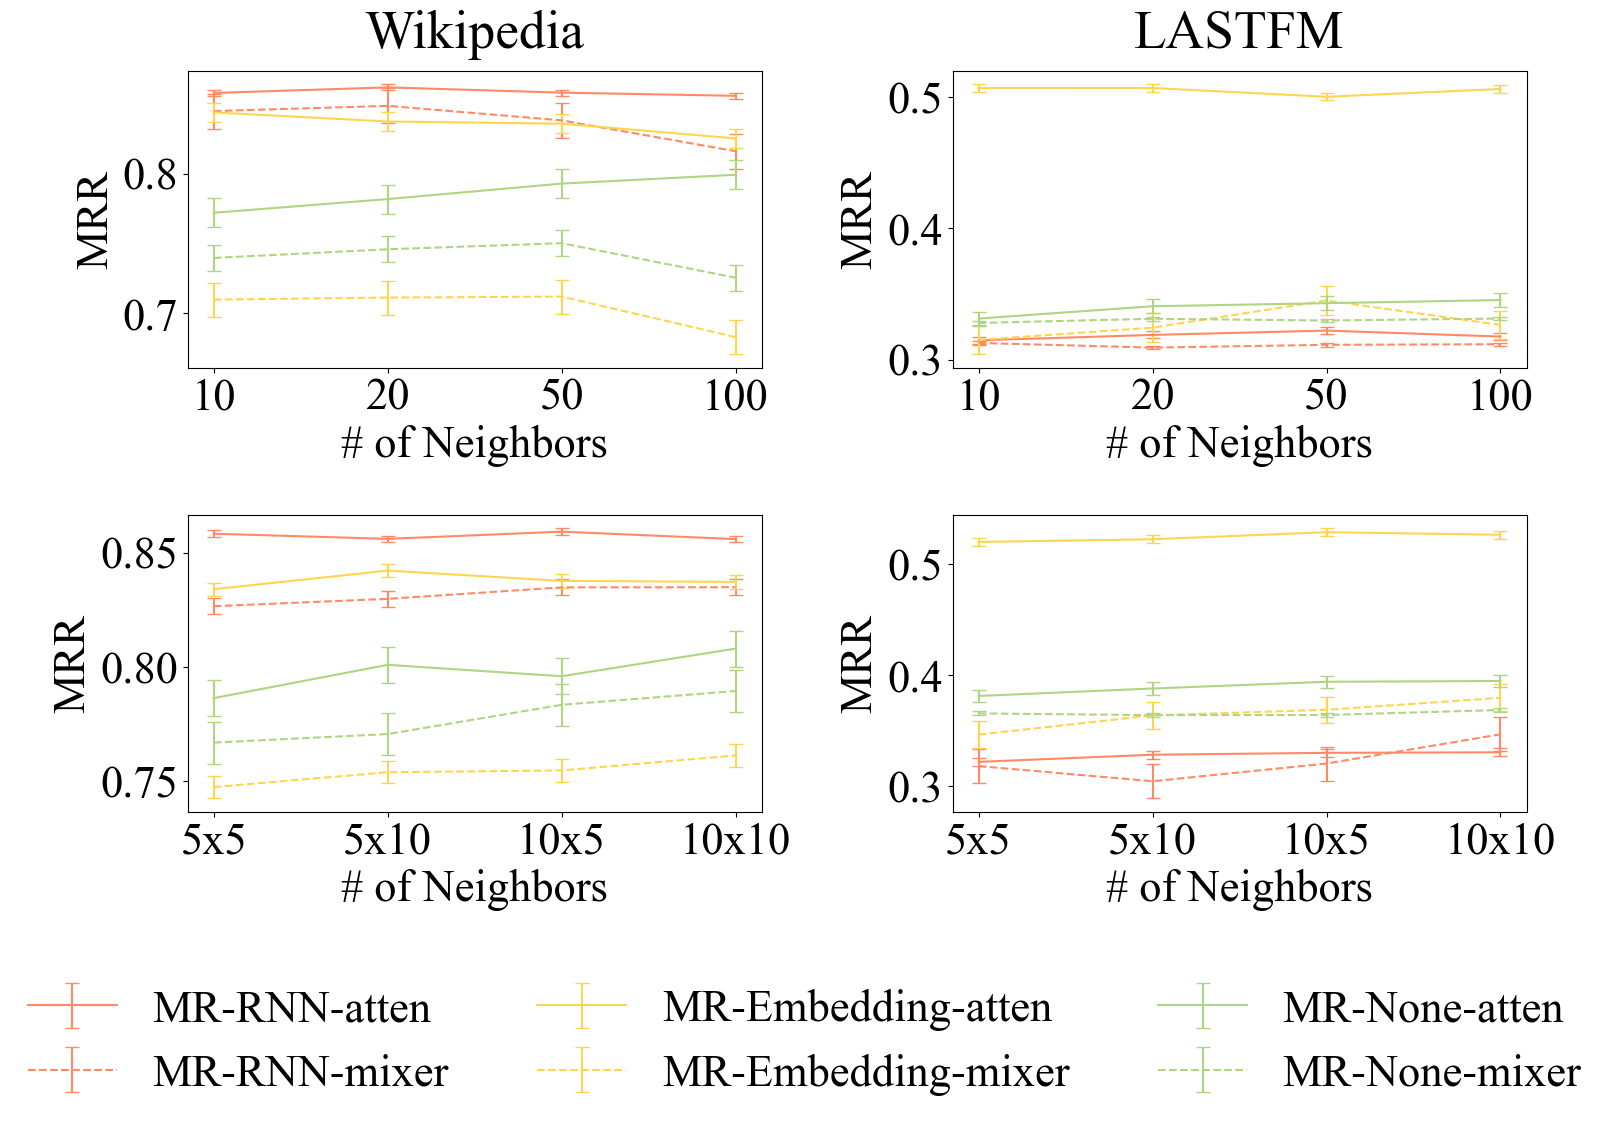

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
datasets = ['WIKI', 'LASTFM', ]


handles = []
i = 0
ax = axes[0]
for k, dataset in enumerate(datasets):
    ax = axes[0][k]
    scans = ['10', '20', '50', '100']
    if dataset == 'mooc' or dataset == 'uci':
        title_str = f'{dataset.upper()}'
    else:
        title_str = f'{show_datasets[dataset]}'
    ax.set_title(title_str, x=0.5, y=1.05)
    df_mean1 = pd.DataFrame()
    df_mean2 = pd.DataFrame()
    df_std1 = pd.DataFrame()
    df_std2 = pd.DataFrame()
    for memory in memorys:
        sampling = 're'
        means = []
        stds = []
        results = []
        results2 = []
        for scan in scans:
            results.append(np.mean(np.array(all_data[dataset][scan]['TGAT'][sampling][memory]) ))
            results2.append(np.mean(np.array(all_data[dataset][scan]['GraphMixer'][sampling][memory])))
        ax.errorbar(x=range(len(scans)), y=results, yerr=np.std(results), fmt='-', capsize=5, label="", color=colors[i])
        ax.errorbar(x=range(len(scans)), y=results2, yerr=np.std(results2), fmt='--', capsize=5, label="", color=colors[i])
        i += 1
    i = 0
    x_labels = scans
    ax.set_xticks(ticks=np.arange(len(x_labels)), labels=x_labels)
    ax.set_xlabel(f'# of Neighbors')
    ax.set_ylabel(f'MRR')

    ax = axes[1][k]
    scans = ['5x5', '5x10', '10x5', '10x10']
    if dataset == 'mooc' or dataset == 'uci':
        title_str = f'{dataset.upper()}'
    else:
        title_str = f'{dataset}'
    # ax.set_title(title_str, x=0.5, y=1.05)
    df_mean1 = pd.DataFrame()
    df_mean2 = pd.DataFrame()
    df_std1 = pd.DataFrame()
    df_std2 = pd.DataFrame()
    for memory in memorys:
        sampling = 're'
        means = []
        stds = []
        results = []
        results2 = []
        for scan in scans:
            results.append(np.mean(np.array(all_data[dataset][scan]['TGAT'][sampling][memory]) ))
            results2.append(np.mean(np.array(all_data[dataset][scan]['GraphMixer'][sampling][memory])))
        
        h1= ax.errorbar(x=range(len(scans)), y=results, yerr=np.std(results), fmt='-', capsize=5, 
                                   label=f"MR-{show_memorys[memory]}-atten", color=colors[i])
        h2=ax.errorbar(x=range(len(scans)), y=results2, yerr=np.std(results2), fmt='--', capsize=5, 
                                   label=f"MR-{show_memorys[memory]}-mixer", color=colors[i])
        if dataset == datasets[0]:
            handles.append(h1)
            handles.append(h2)
        i += 1
    i = 0

    
    x_labels = scans
    ax.set_xticks(ticks=np.arange(len(x_labels)), labels=x_labels)
    ax.set_xlabel(f'# of Neighbors')
    ax.set_ylabel(f'MRR')
# plt.legend(loc='upper right', ncol=2)
# handles = [handle[1] for handle in handles]
fig.legend(handles=handles, frameon=False, bbox_to_anchor=(0.5, .01), loc='upper center',  ncol=3)
plt.tight_layout()
plt.savefig(f'../figures/mrr_aggr.pdf', bbox_inches='tight')

In [ ]:

# if args.save_legends:
#     # Step 1: Create dummy figure and axes
#     fig, ax = plt.subplots()

#     # Step 2: Define your handles and labels
    
#     # handles = []
#     # for i,col in enumerate(df_mean1.columns):
#     #     handles.append(mpatches.Patch(color=colors[i], label=col))
        
#     # Step 3: Create the legend
#     legend = ax.legend(handles=handles, loc='center', ncol=len(handles)/3)

#     # Step 4: Remove the axes
#     ax.axis('off')

#     # Step 5: Save the legend to a PDF file
#     fig.canvas.draw()
#     bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig('figures/legend.pdf', bbox_inches=bbox)